# Sequenziamento del DNA con l'intelligenza artificiale

## Introduzione

Il DNA è un acido nucleico costituito da due catene polinucleotidiche che codificano le istruzioni genetiche per lo sviluppo e il funzionamento di organismi e virus. Ogni catena è formata da nucleotidi, che sono composti da una base azotata (citosina C, guanina G, adenina A o timina T), uno zucchero (desossiribosio) e un gruppo fosfato. Le catene formano uno scheletro zucchero-fosfato e le loro basi si accoppiano tra loro tramite legami idrogeno, seguendo regole specifiche (A con T, C con G).

![DNA](img/dna.png)


A causa della grande complessità delle sequenze di DNA, interpretarle richiede strumenti avanzati. Il machine learning (ML), un sottocampo dell'intelligenza artificiale, svolge un ruolo chiave nell'analisi di grandi set di dati di DNA, nel riconoscimento di "schemi" e nel fare previsioni.

## Come funziona il machine learning in biologia?

Immagina di avere a disposizione tantissime sequenze di DNA. Oni sequenza potrebbe contenere informazioni importanti, come se una persona ha una malattia o no. Analizzarle tutte a mano sarebbe un lavoro enorme, quasi impossibile!

Qui entra in gioco il ML, che consente di insegnare al computer a fare questo lavoro al posto nostro. Il funzionamento è il seguente:

1. Si raccolgono tanti esempi di sequenze di DNA. Ogni esempio ha dei dati in input (le sequenze di DNA) e delle etichette (una categoria che spiega a cosa appartiene quella sequenza, ad esempio una famiglia di geni o se è collegata a una malattia). Tipicamente questi esempi sono disponibili su internet.

2. Il computer "impara" questi esempi e cerca di capire i pattern (ovvero degli "schemi") o le caratteristiche che distinguono una categoria dall'altra.

Così, dopo aver imparato dagli esempi, il computer può analizzare nuove sequenze di DNA e dirti a quale categoria appartengono o se sono legate a una malattia. È un modo intelligente per scoprire informazioni nascoste nel DNA senza dover fare tutto manualmente.

## Obiettivi del progetto

In questo progetto vogliamo usare il machine learning per classificare in maniera automatica delle sequenze di DNA in una delle 7 categorie riportate di seguito:

1. Recettori accoppiati a proteine G: rilevano segnali dall'esterno della cellula, come ormoni o molecole odorose, e attivano risposte interne tramite proteine G. Sono coinvolti in funzioni come visione, olfatto e metabolismo.
2. Tirosin-chinasi: enzimi che aggiungono un gruppo fosfato a una tirosina in una proteina, regolando crescita, divisione e comunicazione cellulare.
3. Proteina tirosina fosfatasi: enzimi che rimuovono il gruppo fosfato da una tirosina, spegnendo segnali attivati dalle tirosin-chinasi e mantenendo l'equilibrio cellulare.
4. Sintetasi: enzimi che formano molecole complesse da molecole semplici senza utilizzare direttamente ATP.
5. Sintasi: simile alla sintetasi, ma costruisce molecole senza richiedere energia da ATP.
6. Canale ionico: proteine che permettono il passaggio di ioni (come sodio, potassio o calcio) attraverso la membrana cellulare, regolando trasmissione nervosa e contrazione muscolare.
7. Fattore di trascrizione: proteine che si legano al DNA per controllare l'attivazione o la repressione di geni, influenzando crescita, sviluppo e risposta allo stress.

## Analisi dei dati

Per prima cosa analizziamo il DNA che abbiamo a disposizione. Questo insieme di dati contiene sequenze di DNA insieme alle corrispondenti classi/etichette delle famiglie geniche.


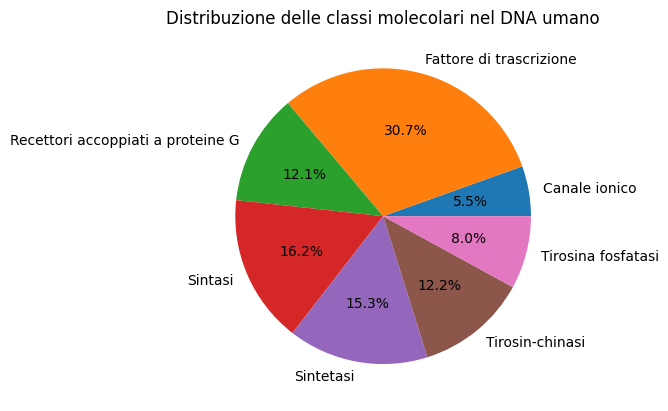

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file di dati
human_dna = pd.read_table('../data/raw/human.txt')

# Crea un dizionario per mappare le classi numeriche alle descrizioni
class_mapping = {
    0: 'Recettori accoppiati a proteine G',
    1: 'Tirosin-chinasi',
    2: 'Tirosina fosfatasi',
    3: 'Sintetasi',
    4: 'Sintasi',
    5: 'Canale ionico',
    6: 'Fattore di trascrizione'
}

# Mappa le classi numeriche alle descrizioni nella colonna 'class'
human_dna['class'] = human_dna['class'].map(class_mapping)

# Conta i valori per ciascuna classe
class_counts = human_dna['class'].value_counts()

# Disegna il diagramma a torta
class_counts.sort_index().plot.pie(
    autopct='%1.1f%%',  # Percentuale visualizzata
    ylabel='',          # Rimuove l'etichetta dell'asse Y
)

plt.title("Distribuzione delle classi molecolari nel DNA umano")  # Titolo del grafico
plt.show()

## Estrazione di caratteristiche da sequenze di coppie di basi

I modelli di intelligenza artificiale funzionano con numeri, ma le sequenze di DNA sono fatte di basi azotate (A, T, C, G). Dobbiamo quindi trasformare queste sequenze in un formato che il computer possa capire. Un modo semplice per farlo è usare il conteggio dei $k$-meri.

### Che cos'è il conteggio $k$-meri?

Consideriamo questa analogia:
- Il genoma è come un libro.
- I geni sono come le frasi e i capitoli del libro.
- I **$k$-meri** sono come le parole del libro.
- Le basi azotate (A, T, C, G) sono come le lettere dell'alfabeto con cui il libro è stato scritto.

Grazie a questa analogia, possiamo usare le tecniche di elaborazione del linguaggio naturale (NLP), che normalmente servono per analizzare le lingue umane, anche per analizzare sequenze di DNA.

### Come funziona il conteggio $k$-meri

Il processo è il seguente: una sequenza di DNA è divisa in "sottoparole" sovrapposte di lunghezza $k$.

#### Esempio
Se la sequenza di DNA è `ATGCATGCA` e scegliamo $k=6$, la sequenza viene divisa nei seguenti esameri:
1. `ATGCAT`
2. `TGCATG`
3. `GCATGC`
4. `CATGCA`

Questo processo crea delle sottosequenze sovrapposte chiamate $k$-meri.

### Perché usare i $k$-meri?

In genetica, questo metodo aiuta a semplificare sequenze complesse. Contando quante volte ogni $k$-mer appare nel DNA, otteniamo una rappresentazione numerica della sequenza. Questa rappresentazione può essere usata come input per modelli di machine learning, che poi possono identificare pattern, classificare sequenze o prevedere funzioni biologiche.

In [2]:
import pandas as pd

# Carica il file di dati
human_dna = pd.read_table('../data/raw/human.txt')

# Crea un dizionario per mappare le classi numeriche alle descrizioni
class_mapping = {
    0: 'Recettori accoppiati a proteine G',
    1: 'Tirosin-chinasi',
    2: 'Tirosina fosfatasi',
    3: 'Sintetasi',
    4: 'Sintasi',
    5: 'Canale ionico',
    6: 'Fattore di trascrizione'
}

# Mappa le classi numeriche alle descrizioni nella colonna 'Class'
human_dna['class'] = human_dna['class'].map(class_mapping)

# Mostra la tabella aggiornata
human_dna

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,Sintasi
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,Sintasi
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,Sintetasi
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,Sintetasi
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,Sintetasi
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,Recettori accoppiati a proteine G
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,Fattore di trascrizione
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,Fattore di trascrizione
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,Fattore di trascrizione


In [3]:
import pandas as pd

def get_kmers(sequence, k):
    if len(sequence) < k:
        pass
        # raise ValueError("La lunghezza della sequenza deve essere maggiore o uguale a k")
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmers.append(sequence[i:i + k])
    return kmers

def join_kmers(kmers):
    return ' '.join(kmers)

# Estrai i k-mers per ogni sequenza
k = 6
human_dna['k-mers'] = human_dna.apply(lambda x: get_kmers(x['sequence'], k), axis=1)

# Unisci i k-mers in una singola stringa per ogni riga
human_dna['k-mers'] = human_dna['k-mers'].apply(join_kmers)

# Riordina le colonne per avere 'joined-kmers' come prima e 'class' come seconda
human_dna = human_dna[['k-mers', 'class']]

# Stampa il DataFrame risultante
human_dna

,k-mers,class
0,ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...,Sintasi
1,ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...,Sintasi
2,ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...,Sintetasi
3,ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...,Sintetasi
4,ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...,Sintetasi
...,...,...
4375,ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...,Recettori accoppiati a proteine G
4376,ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...,Fattore di trascrizione
4377,ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...,Fattore di trascrizione
4378,ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...,Fattore di trascrizione


### Utilizzo di Bag of Words per il sequenziamento del DNA

Il modello Bag of Words (BoW) è una tecnica semplice usata in intelligenza artificiale per lavorare con testi. Nel nostro progetto, BoW viene adattato per trattare i $k$-meri.

#### Come funziona BoW per il sequenziamento del DNA

Con la tecnica BoW contiamo quante volte ogni $k$-mero appare in una sequenza di DNA.

Esempio:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Brevi sequenze di DNA
sequenze = ['ATCGTACG', 'CGTACGTA', 'TACGATCG']

# Utilizzo di CountVectorizer per analizzare gruppi di 4 caratteri (tetramer)
vectorizer = CountVectorizer(ngram_range=(4, 4), analyzer='char', lowercase=False)
X = vectorizer.fit_transform(sequenze)
feature_names = vectorizer.get_feature_names_out()

# Creazione di un DataFrame con la matrice
df = pd.DataFrame(X.toarray(), columns=feature_names)

# Aggiunta di una colonna con i nomi delle sequenze
df.insert(0, 'Sequenza', ['Sequenza 1', 'Sequenza 2', 'Sequenza 3'])

print(df.to_string(index=False))

  Sequenza  ACGA  ACGT  ATCG  CGAT  CGTA  GATC  GTAC  TACG  TCGT
Sequenza 1     0     0     1     0     1     0     1     1     1
Sequenza 2     0     1     0     0     2     0     1     1     0
Sequenza 3     1     0     1     1     0     1     0     1     0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

k_mers = human_dna['k-mers']
countVectorizer = CountVectorizer(ngram_range=(4,4))
x_train = countVectorizer.fit_transform(k_mers)
y_train = human_dna.iloc[:, 1].values

### Addestramento del modello

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

### Fase di valutazione del modello

Una volta che la nostra intelligenza artificiale è stata addestrata sulle sequenze di DNA e sulle rispettive etichette associate, dobbiamo verificarne quanto è efficace nel fare previsioni su nuove sequenze di DNA che non ha mai visto. 

Per farlo, utilizziamo delle misure di valutazione che ci dicono quanto il classificatore è stato bravo ad associare a ciascuna sequenza di DNA la rispettiva classe molecolare. Le metriche più comuni sono:

1. Accuratezza: è il numero di previsioni corrette che il modello ha fatto rispetto al totale delle previsioni.

2. Precisione: ci dice quante delle previsioni fatte dal modello sono corrette.

3. Richiamo: ci dice quante delle sequenze che effettivamente appartengono a una certa classe sono state trovate dal modello. In pratica, quanto il modello è stato bravo a "scoprire" tutte le sequenze della classe giusta.

4. F1: è una misura che cerca di bilanciare precisione e richiamo.

Le prestazioni possono essere visualizzate anche graficamente tramite una tabella chiamata matrice di confusione.

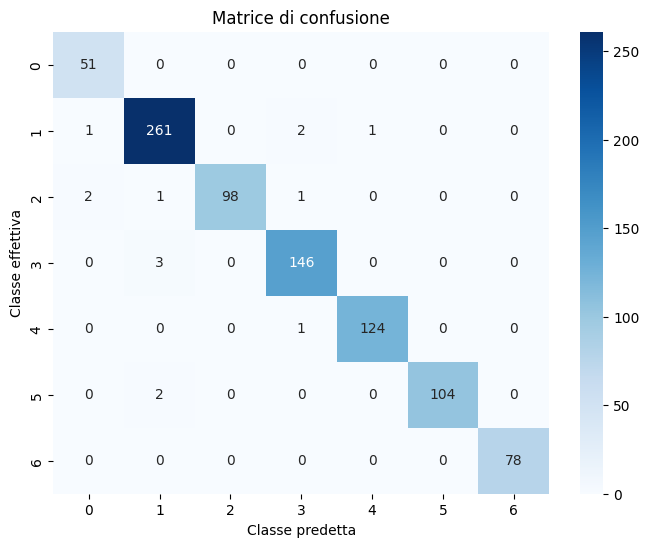

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = classifier.predict(x_test)

# Calcolare la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Creare una mappa di calore per la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)

# Aggiungere etichette
plt.xlabel('Classe predetta')
plt.ylabel('Classe effettiva')
plt.title('Matrice di confusione')

# Mostra la mappa di calore
plt.show()

Accuratezza: 98.40%
Precisione: 98.43%
Richiamo: 98.40%
F1: 98.40%


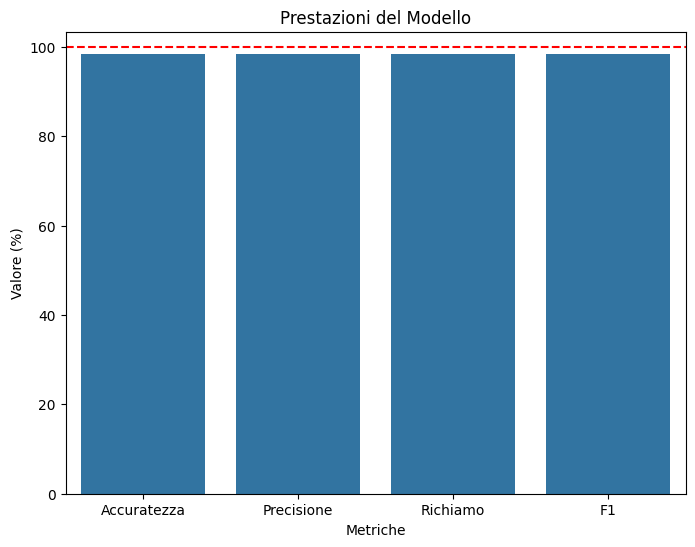

In [8]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolare le metriche
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Stampare i risultati in percentuale
print(f"Accuratezza: {accuracy * 100:.2f}%")
print(f"Precisione: {precision * 100:.2f}%")
print(f"Richiamo: {recall * 100:.2f}%")
print(f"F1: {f1 * 100:.2f}%")

# Creare un dizionario con le metriche
metrics = {'Accuratezza': accuracy * 100, 'Precisione': precision * 100, 'Richiamo': recall * 100, 'F1': f1 * 100}

# Creare un grafico a barre
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))

# Aggiungere etichette e titoli
plt.xlabel('Metriche')
plt.ylabel('Valore (%)')
plt.title('Prestazioni del Modello')

# Tracciare una linea orizzontale tratteggiata al valore 100
plt.axhline(y=100, color='r', linestyle='--')

# Mostrare il grafico
plt.show()

### Qualche esempio di classificazione

In [9]:
for i in range(0, 5):
    original_sequence_no_spaces = human_dna['k-mers'][i].replace(" ", "")
    
    print(f"Sequenza:\n{original_sequence_no_spaces}")
    print(f"AI dice: {y_pred[i]}")
    print(f"La classe effettiva è: {y_test[i]}")
    print("")

Sequenza:
ATGCCCTGCCCCGCCCCACCCCAACCCAACCCAACTCAACTAAACTAAACTAAACTAAATTAAATAAAATACAATACTATACTATACTACACTACCCTACCGTACCGTACCGTACCGTATCGTATGGTATGGTATGGCATGGCCTGGCCCGGCCCAGCCCACCCCACCCCACCACACCATACCATACCATAACATAATATAATTTAATTAAATTACATTACCTTACCCTACCCCACCCCCCCCCCACCCCATCCCATACCATACCATACTATACTCTACTCCACTCCTCTCCTTTCCTTACCTTACCTTACATTACACTACACTACACTACACTATACTATTCTATTCTATTCCATTCCTTTCCTCTCCTCACCTCATCTCATCTCATCACATCACATCACCTCACCCCACCCAACCCAACCCAACCCAACTCAACTAAACTAAACTAAACTAAAATAAAAAAAAAATAAAATAAAATATAATATTATATTATATTAAATTAAATTAAACTAAACAAAACACAACACAACACAACACAAAACAAACCAAACTAAACTAAACTACACTACCCTACCATACCACACCACCCCACCTCACCTAACCTACCCTACCCTACCTTACCTCACCTCCCCTCCCCTCCCTTCCCTCCCCTCACCTCACCTCACCTCACCACACCAAACCAAACCAAAGCAAAGCAAAGCCAAGCCCAGCCCAGCCCATCCCATACCATAACATAAAATAAAATAAAAAAAAAATAAAATAAAATAAAATAAAATAAAATAAAAAAAAAAAAAAAATAAAATTAAATTAAATTATATTATATTATAATATAACATAACATAACAAAACAAAACAAACCAAACCAAACCCAACCCTACCCTGCCCTGACCTGAGCTGAGATGAGAAGAGAACAGAACCGAACCAAACCAAACCAAACCAAAACAAAATAAAATGAAATGAAATGAAATGAACTGAACGGAACGAAACGAA